In [154]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2023-12-26 15:29:13.025866


In [155]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [156]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [157]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [158]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [159]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

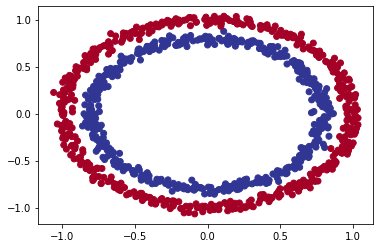

In [160]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [161]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [162]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [163]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [164]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5


32/32 [==============================] - 0s 470us/step - loss: 5.0557 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 404us/step - loss: 4.6173 - accuracy: 0.4610
Epoch 3/5
32/32 [==============================] - 0s 403us/step - loss: 4.1056 - accuracy: 0.4720
Epoch 4/5
32/32 [==============================] - 0s 370us/step - loss: 2.1365 - accuracy: 0.4890
Epoch 5/5
32/32 [==============================] - 0s 375us/step - loss: 0.7296 - accuracy: 0.4940


In [165]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 393us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [166]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less
     

In [167]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 409us/step - loss: 0.6933 - accuracy: 0.5000


[0.6932789087295532, 0.5]

In [168]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data
     

Epoch 1/100
32/32 [==============================] - 0s 570us/step - loss: 2.3230 - accuracy: 0.4270
Epoch 2/100
32/32 [==============================] - 0s 488us/step - loss: 0.7164 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 469us/step - loss: 0.6953 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 445us/step - loss: 0.6979 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 455us/step - loss: 0.6967 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 455us/step - loss: 0.6991 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 445us/step - loss: 0.6964 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 453us/step - loss: 0.6942 - accuracy: 0.5200
Epoch 9/100
32/32 [==============================] - 0s 464us/step - loss: 0.7011 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 771us/step - loss: 0.6950 - accura

In [169]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
     

313/313 [==============================] - 0s 290us/step
doing binary classifcation...


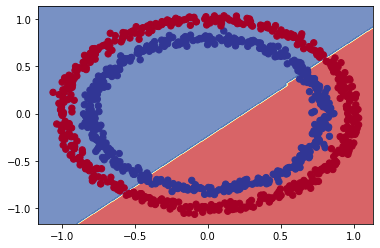

In [170]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [171]:
"""# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)
"""

'# Set random seed\ntf.random.set_seed(42)\n\n# Create some regression data\nX_regression = np.arange(0, 1000, 5)\ny_regression = np.arange(100, 1100, 5)\n\n# Split it into training and test sets\nX_reg_train = X_regression[:150]\nX_reg_test = X_regression[150:]\ny_reg_train = y_regression[:150]\ny_reg_test = y_regression[150:]\n\n# Fit our model to the data\n# Note: Before TensorFlow 2.7.0, this line would work\n# model_3.fit(X_reg_train, y_reg_train, epochs=100)\n\n# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278\nmodel_3.fit(tf.expand_dims(X_reg_train, axis=-1),\n            y_reg_train,\n            epochs=100)\n'

In [172]:
model_3.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 100)               300       
                                                                 
 dense_75 (Dense)            (None, 10)                1010      
                                                                 
 dense_76 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 392.9685 - mae: 392.9685
Epoch 2/100
5/5 [==============================] - 0s 739us/step - loss: 245.3599 - mae: 245.3599
Epoch 3/100
5/5 [==============================] - 0s 781us/step - loss: 104.3973 - mae: 104.3973
Epoch 4/100
5/5 [==============================] - 0s 944us/step - loss: 63.2136 - mae: 63.2136
Epoch 5/100
5/5 [==============================] - 0s 859us/step - loss: 87.3831 - mae: 87.3831
Epoch 6/100
5/5 [==============================] - 0s 702us/step - loss: 59.4417 - mae: 59.4417
Epoch 7/100
5/5 [==============================] - 0s 703us/step - loss: 46.1920 - mae: 46.1920
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 45.3348 - mae: 45.3348
Epoch 9/100
5/5 [==============================] - 0s 802us/step - loss: 44.7365 - mae: 44.7365
Epoch 10/100
5/5 [==============================] - 0s 816us/step - loss: 43.3972 - mae: 43.3972
Epoch 11/100
5/5 [===================

2/2 [==============================] - 0s 991us/step


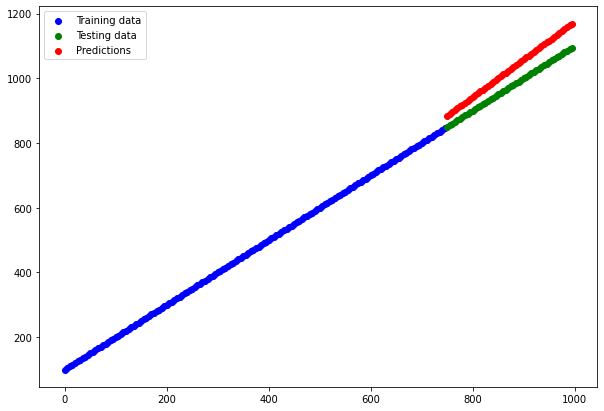

In [174]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [175]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)
     

Epoch 1/100
32/32 [==============================] - 0s 522us/step - loss: 4.2350 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 513us/step - loss: 4.0750 - accuracy: 0.4320
Epoch 3/100
32/32 [==============================] - 0s 453us/step - loss: 3.8865 - accuracy: 0.4140
Epoch 4/100
32/32 [==============================] - 0s 410us/step - loss: 3.7106 - accuracy: 0.4220
Epoch 5/100
32/32 [==============================] - 0s 414us/step - loss: 3.4736 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 406us/step - loss: 3.4250 - accuracy: 0.4450
Epoch 7/100
32/32 [==============================] - 0s 394us/step - loss: 3.3844 - accuracy: 0.4470
Epoch 8/100
32/32 [==============================] - 0s 404us/step - loss: 3.3509 - accuracy: 0.4490
Epoch 9/100
32/32 [==============================] - 0s 409us/step - loss: 3.2578 - accuracy: 0.4520
Epoch 10/100
32/32 [==============================] - 0s 398us/step - loss: 3.1653 - accura

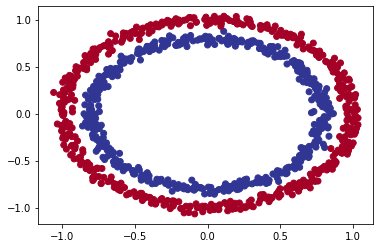

In [176]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 331us/step
doing binary classifcation...


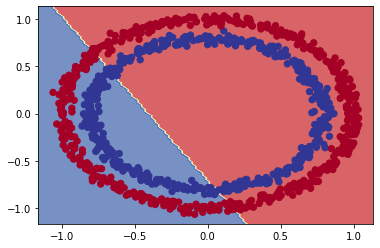

In [177]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

In [178]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 537us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 459us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 443us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 447us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 616us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 419us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 463us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 404us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 404us/step - loss: 7.7125 - accuracy

In [179]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 572us/step - loss: 4.4584 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 492us/step - loss: 3.6674 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 473us/step - loss: 3.3076 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 436us/step - loss: 3.1310 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 444us/step - loss: 2.9366 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 594us/step - loss: 2.8263 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 432us/step - loss: 2.6283 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 507us/step - loss: 2.3051 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 451us/step - loss: 1.6166 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 447us/step - loss: 1.1662 - accura

In [180]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 413us/step - loss: 0.6841 - accuracy: 0.5430


[0.6841212511062622, 0.5429999828338623]

313/313 [==============================] - 0s 275us/step
doing binary classifcation...


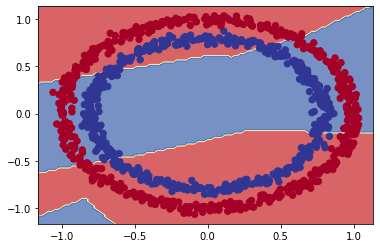

In [181]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [182]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [183]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 404us/step - loss: 0.6159 - accuracy: 0.6330


[0.6159154176712036, 0.6330000162124634]

313/313 [==============================] - 0s 274us/step
doing binary classifcation...


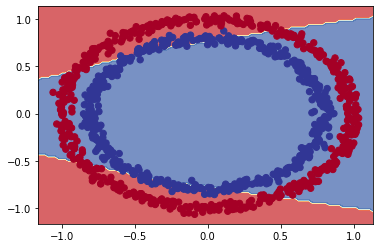

In [184]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [185]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

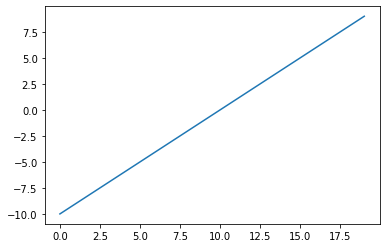

In [186]:
# Visualize our toy tensor
plt.plot(A)

In [187]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

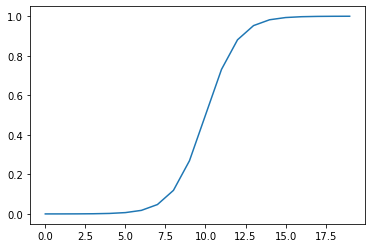

In [188]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A))

In [189]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

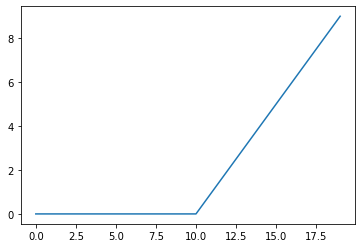

In [190]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [191]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [192]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [193]:
# How many examples are in the whole dataset?
len(X)

1000

In [194]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [195]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 567us/step - loss: 0.6957 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 477us/step - loss: 0.6883 - accuracy: 0.5100
Epoch 3/25
25/25 [==============================] - 0s 459us/step - loss: 0.6815 - accuracy: 0.5525
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5688
Epoch 5/25
25/25 [==============================] - 0s 435us/step - loss: 0.6709 - accuracy: 0.5900
Epoch 6/25
25/25 [==============================] - 0s 426us/step - loss: 0.6635 - accuracy: 0.5850
Epoch 7/25
25/25 [==============================] - 0s 414us/step - loss: 0.6493 - accuracy: 0.6338
Epoch 8/25
25/25 [==============================] - 0s 444us/step - loss: 0.6392 - accuracy: 0.6700
Epoch 9/25
25/25 [==============================] - 0s 440us/step - loss: 0.6202 - accuracy: 0.6737
Epoch 10/25
25/25 [==============================] - 0s 452us/step - loss: 0.5986 - accuracy: 0.7237
E

In [196]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 607us/step - loss: 0.1867 - accuracy: 0.9300
Model loss on the test set: 0.18673373758792877
Model accuracy on the test set: 93.00%


313/313 [==============================] - 0s 275us/step
doing binary classifcation...
313/313 [==============================] - 0s 329us/step
doing binary classifcation...


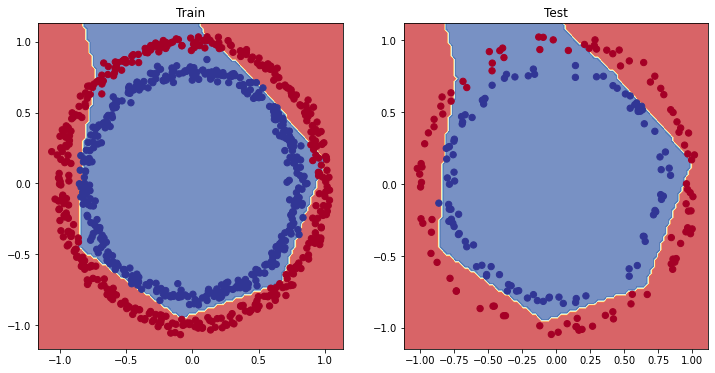

In [197]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [198]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.695685,0.48250
1,0.688319,0.51000
2,0.681516,0.55250
3,0.676343,0.56875
4,0.670869,0.59000
5,0.663482,0.58500
6,0.649255,0.63375
7,0.639227,0.67000
8,0.620236,0.67375
9,0.598558,0.72375


Text(0.5, 1.0, 'Model_8 training curves')

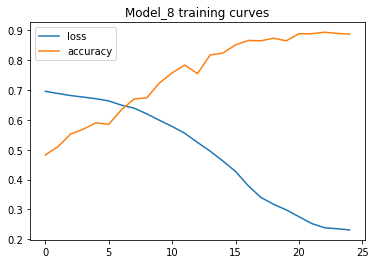

In [199]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [200]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 596us/step - loss: 0.6926 - accuracy: 0.5113 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 470us/step - loss: 0.6925 - accuracy: 0.5125 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 448us/step - loss: 0.6924 - accuracy: 0.5125 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 421us/step - loss: 0.6922 - accuracy: 0.5125 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 408us/step - loss: 0.6921 - accuracy: 0.5100 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 404us/step - loss: 0.6920 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 403us/step - loss: 0.6918 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 409us/step - loss: 0.6916 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

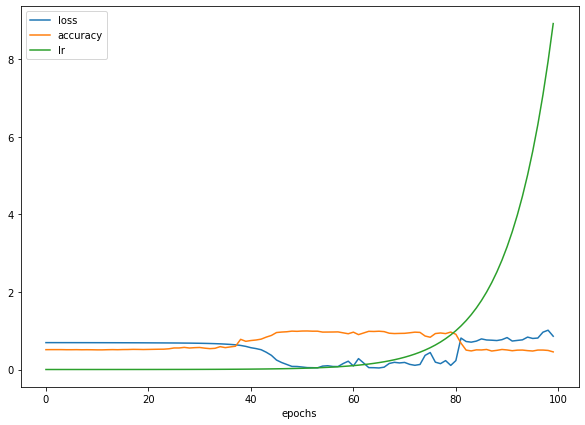

In [201]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs. loss')

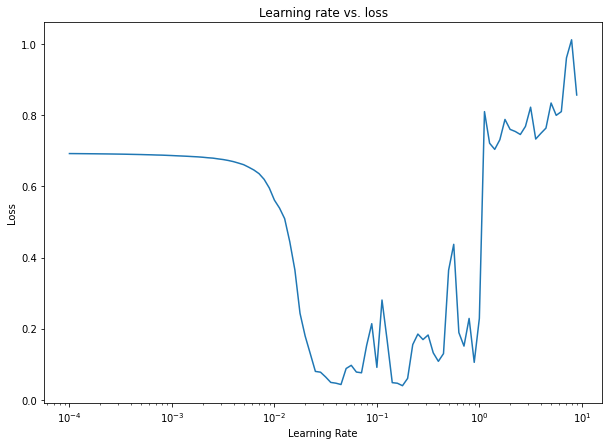

In [202]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [203]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [204]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 553us/step - loss: 0.6881 - accuracy: 0.5550
Epoch 2/20
25/25 [==============================] - 0s 485us/step - loss: 0.6751 - accuracy: 0.5587
Epoch 3/20
25/25 [==============================] - 0s 453us/step - loss: 0.6576 - accuracy: 0.5850
Epoch 4/20
25/25 [==============================] - 0s 451us/step - loss: 0.6266 - accuracy: 0.6500
Epoch 5/20
25/25 [==============================] - 0s 416us/step - loss: 0.5747 - accuracy: 0.6975
Epoch 6/20
25/25 [==============================] - 0s 420us/step - loss: 0.4716 - accuracy: 0.8163
Epoch 7/20
25/25 [==============================] - 0s 422us/step - loss: 0.4044 - accuracy: 0.8462
Epoch 8/20
25/25 [==============================] - 0s 424us/step - loss: 0.3355 - accuracy: 0.8913
Epoch 9/20
25/25 [==============================] - 0s 427us/step - loss: 0.2708 - accuracy: 0.9450
Epoch 10/20
25/25 [==============================] - 0s 414us/step - loss: 0.2400 - accuracy: 0.9438

In [205]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 616us/step - loss: 0.1311 - accuracy: 0.9550


[0.13109992444515228, 0.9549999833106995]

313/313 [==============================] - 0s 276us/step
doing binary classifcation...
313/313 [==============================] - 0s 278us/step
doing binary classifcation...


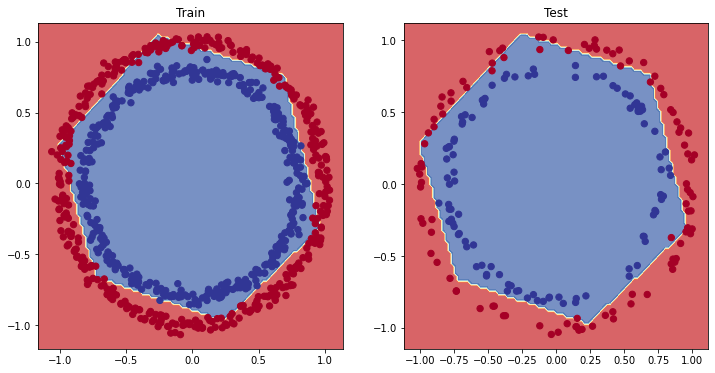

In [206]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [207]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 654us/step - loss: 0.1311 - accuracy: 0.9550
Model loss on test set: 0.13109992444515228
Model accuracy on test set: 95.50%


In [208]:
"""# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)
"""

'# Create a confusion matrix\nfrom sklearn.metrics import confusion_matrix\n\n# Make predictions\ny_preds = model_10.predict(X_test)\n\n# Create confusion matrix\nconfusion_matrix(y_test, y_preds)\n'

In [209]:
# View the first 10 predictions
y_preds[:10]

array([[0.7333264 ],
       [0.91505253],
       [0.65048105],
       [0.91505253],
       [0.02007465],
       [0.08313464],
       [0.67608607],
       [0.7160373 ],
       [0.91505253],
       [0.07026875]], dtype=float32)

In [210]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [211]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [212]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[83, 18],
       [ 1, 98]])

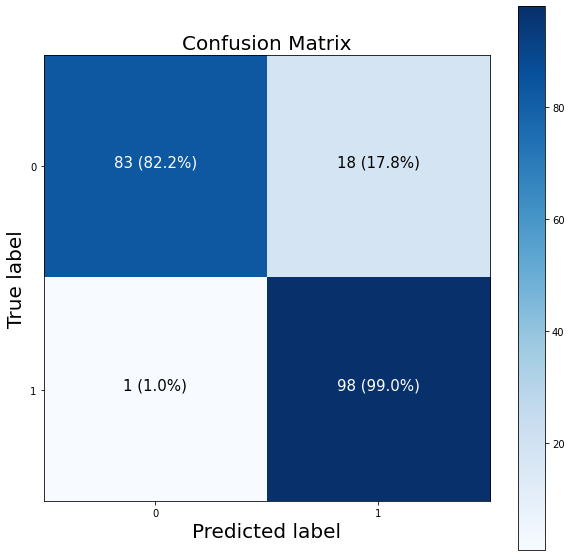

In [213]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [214]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


In [215]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [216]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [217]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [218]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

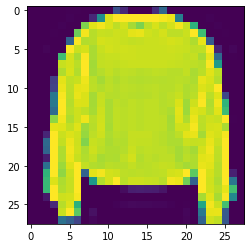

In [219]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [220]:
# Check our samples label
train_labels[7]

2

In [221]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

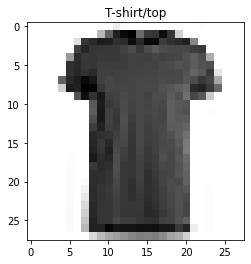

In [222]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]])

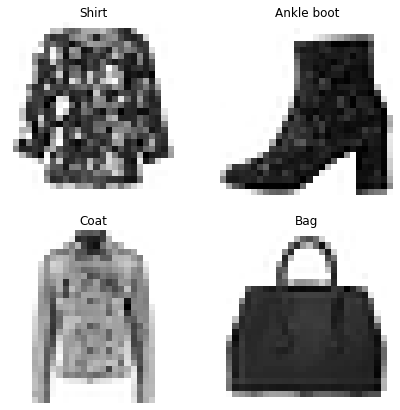

In [223]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [224]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training
     

Epoch 1/10
1875/1875 [==============================] - 1s 480us/step - loss: 2.3260 - accuracy: 0.1229 - val_loss: 2.2266 - val_accuracy: 0.1346
Epoch 2/10
1875/1875 [==============================] - 1s 455us/step - loss: 2.1391 - accuracy: 0.1701 - val_loss: 2.0240 - val_accuracy: 0.2020
Epoch 3/10
1875/1875 [==============================] - 1s 444us/step - loss: 1.9088 - accuracy: 0.2255 - val_loss: 1.7326 - val_accuracy: 0.2748
Epoch 4/10
1875/1875 [==============================] - 1s 443us/step - loss: 1.6286 - accuracy: 0.3230 - val_loss: 1.5291 - val_accuracy: 0.3815
Epoch 5/10
1875/1875 [==============================] - 1s 458us/step - loss: 1.4840 - accuracy: 0.3744 - val_loss: 1.4467 - val_accuracy: 0.3879
Epoch 6/10
1875/1875 [==============================] - 1s 444us/step - loss: 1.4079 - accuracy: 0.4110 - val_loss: 1.3797 - val_accuracy: 0.4349
Epoch 7/10
1875/1875 [==============================] - 1s 443us/step - loss: 1.3594 - accuracy: 0.4282 - val_loss: 1.3532 -

In [225]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_99 (Dense)            (None, 4)                 3140      
                                                                 
 dense_100 (Dense)           (None, 4)                 20        
                                                                 
 dense_101 (Dense)           (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [226]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [227]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [228]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))
     

Epoch 1/10
1875/1875 [==============================] - 1s 485us/step - loss: 1.4722 - accuracy: 0.4173 - val_loss: 1.0728 - val_accuracy: 0.6128
Epoch 2/10
1875/1875 [==============================] - 1s 456us/step - loss: 0.9848 - accuracy: 0.6286 - val_loss: 0.9353 - val_accuracy: 0.6666
Epoch 3/10
1875/1875 [==============================] - 1s 444us/step - loss: 0.8662 - accuracy: 0.6778 - val_loss: 0.8293 - val_accuracy: 0.7148
Epoch 4/10
1875/1875 [==============================] - 1s 443us/step - loss: 0.7870 - accuracy: 0.7221 - val_loss: 0.7839 - val_accuracy: 0.7349
Epoch 5/10
1875/1875 [==============================] - 1s 458us/step - loss: 0.7473 - accuracy: 0.7418 - val_loss: 0.7523 - val_accuracy: 0.7395
Epoch 6/10
1875/1875 [==============================] - 1s 444us/step - loss: 0.7211 - accuracy: 0.7554 - val_loss: 0.7528 - val_accuracy: 0.7476
Epoch 7/10
1875/1875 [==============================] - 1s 442us/step - loss: 0.7039 - accuracy: 0.7608 - val_loss: 0.7462 -

<Axes: title={'center': 'Normalized data'}>

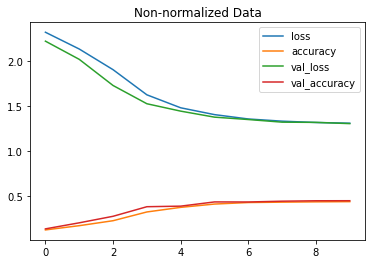

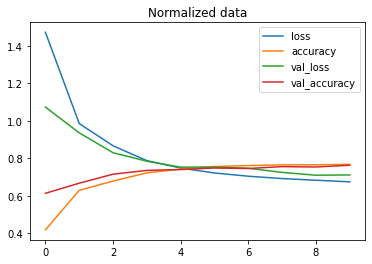

In [229]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [230]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 1s 485us/step - loss: 1.2382 - accuracy: 0.5243 - val_loss: 0.9150 - val_accuracy: 0.6564 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 460us/step - loss: 0.8219 - accuracy: 0.7035 - val_loss: 0.8118 - val_accuracy: 0.7029 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 449us/step - loss: 0.7541 - accuracy: 0.7275 - val_loss: 0.7668 - val_accuracy: 0.7215 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 449us/step - loss: 0.7224 - accuracy: 0.7381 - val_loss: 0.7351 - val_accuracy: 0.7344 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 458us/step - loss: 0.7033 - accuracy: 0.7448 - val_loss: 0.7130 - val_accuracy: 0.7423 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 448us/step - loss: 0.6855 - accuracy: 0.7518 - val_loss: 0.7182 - val_accuracy: 0.7553 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Finding the ideal learning rate')

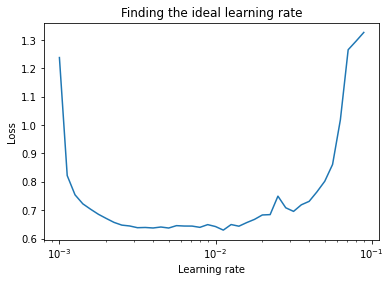

In [231]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [232]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 1s 511us/step - loss: 1.1002 - accuracy: 0.6202 - val_loss: 0.7534 - val_accuracy: 0.7355
Epoch 2/20
1875/1875 [==============================] - 1s 463us/step - loss: 0.6683 - accuracy: 0.7627 - val_loss: 0.6555 - val_accuracy: 0.7645
Epoch 3/20
1875/1875 [==============================] - 1s 462us/step - loss: 0.5776 - accuracy: 0.7891 - val_loss: 0.5907 - val_accuracy: 0.7807
Epoch 4/20
1875/1875 [==============================] - 1s 461us/step - loss: 0.5436 - accuracy: 0.7977 - val_loss: 0.5642 - val_accuracy: 0.7921
Epoch 5/20
1875/1875 [==============================] - 1s 457us/step - loss: 0.5305 - accuracy: 0.8038 - val_loss: 0.5586 - val_accuracy: 0.7948
Epoch 6/20
1875/1875 [==============================] - 1s 505us/step - loss: 0.5210 - accuracy: 0.8088 - val_loss: 0.5525 - val_accuracy: 0.7962
Epoch 7/20
1875/1875 [==============================] - 1s 481us/step - loss: 0.5143 - accuracy: 0.8119 - val_loss: 0.5580 -

In [233]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [234]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 292us/step


array([[1.20440774e-04, 6.76913525e-11, 1.96410338e-06, 1.27161198e-04,
        4.51469688e-08, 1.08007275e-01, 6.91934038e-05, 1.02899559e-01,
        3.78759913e-02, 7.50898302e-01],
       [4.79065056e-05, 3.51454386e-11, 9.67691958e-01, 4.62061435e-05,
        1.04763443e-02, 0.00000000e+00, 2.16879137e-02, 3.23712921e-35,
        4.95771565e-05, 1.64812096e-32],
       [9.00747921e-07, 9.99021769e-01, 4.22500506e-08, 7.92284554e-04,
        1.84798584e-04, 0.00000000e+00, 2.08410341e-07, 6.34177020e-23,
        1.37516311e-12, 1.48133753e-31],
       [1.89757273e-07, 9.99414563e-01, 4.51565585e-09, 5.26468386e-04,
        5.87368595e-05, 0.00000000e+00, 3.27035359e-08, 3.87757373e-18,
        5.63843286e-12, 1.23113772e-27],
       [1.22089460e-01, 3.59342630e-05, 1.39874101e-01, 2.03060545e-02,
        1.71151310e-02, 1.93331093e-18, 6.97105646e-01, 2.37352835e-13,
        3.47372936e-03, 4.94184338e-12]], dtype=float32)

In [235]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [236]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [237]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[708,   2,   6,  65,  10,   2, 197,   0,  10,   0],
       [  0, 941,   0,  35,  15,   0,   8,   0,   1,   0],
       [  5,   1, 578,  11, 237,   0, 163,   0,   5,   0],
       [ 18,   9,  12, 835,  58,   0,  63,   0,   5,   0],
       [  0,   0,  61,  29, 852,   1,  57,   0,   0,   0],
       [  0,   0,   0,   1,   0, 878,   3,  54,  28,  36],
       [111,   2, 116,  39, 219,   0, 497,   0,  15,   1],
       [  0,   0,   0,   0,   0,  28,   0, 923,  16,  33],
       [  1,   1,  16,  14,   6,   2,  74,   2, 884,   0],
       [  0,   0,   0,   0,   0,  15,   1,  41,   8, 935]])

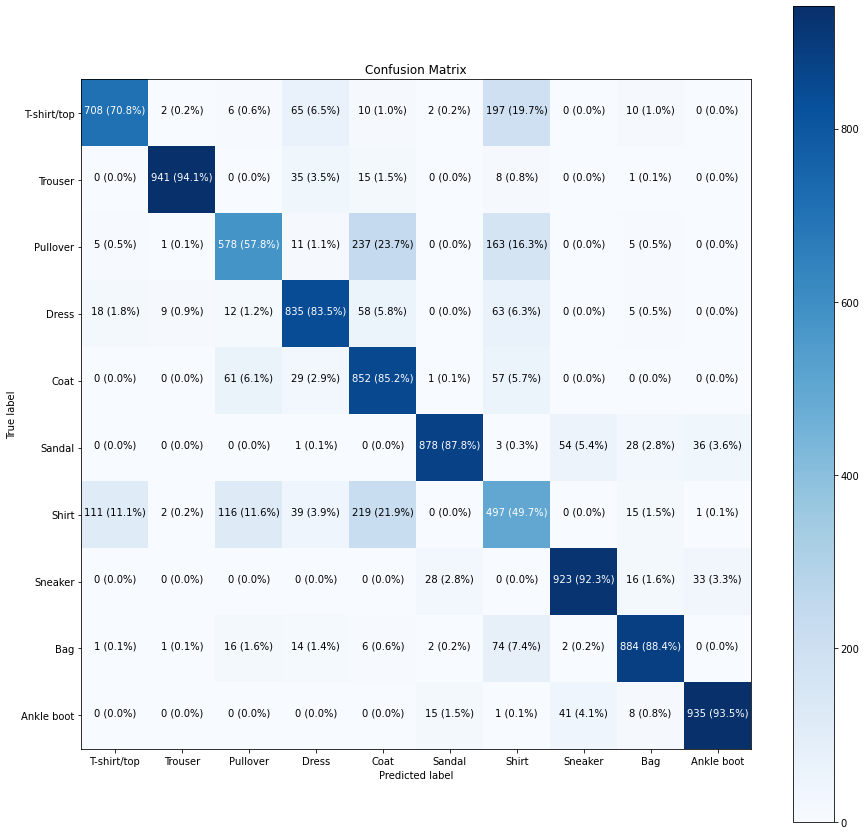

In [238]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [239]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
     

1/1 [==============================] - 0s 9ms/step


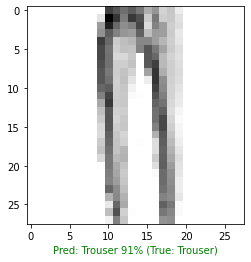

In [240]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [241]:
# Find the layers of our most recent model
model_14.layers

In [242]:
# Extract a particular layer
model_14.layers[1]

In [243]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.25634214,  0.23769407,  0.37190714, -0.36393932],
        [ 0.3654682 ,  0.93591475,  0.60281175, -0.5141754 ],
        [ 1.0743753 ,  0.33260304,  0.9866138 , -0.93093276],
        ...,
        [-0.11009207, -0.07085495, -0.84476566, -0.25486988],
        [-0.33240604,  0.02117281,  0.06502847, -0.8049252 ],
        [-0.30086863,  0.54691195,  0.5195769 ,  0.09764978]],
       dtype=float32),
 (784, 4))

In [244]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.25634214,  0.23769407,  0.37190714, -0.36393932],
        [ 0.3654682 ,  0.93591475,  0.60281175, -0.5141754 ],
        [ 1.0743753 ,  0.33260304,  0.9866138 , -0.93093276],
        ...,
        [-0.11009207, -0.07085495, -0.84476566, -0.25486988],
        [-0.33240604,  0.02117281,  0.06502847, -0.8049252 ],
        [-0.30086863,  0.54691195,  0.5195769 ,  0.09764978]],
       dtype=float32),
 (784, 4))

In [245]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_108 (Dense)           (None, 4)                 3140      
                                                                 
 dense_109 (Dense)           (None, 4)                 20        
                                                                 
 dense_110 (Dense)           (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


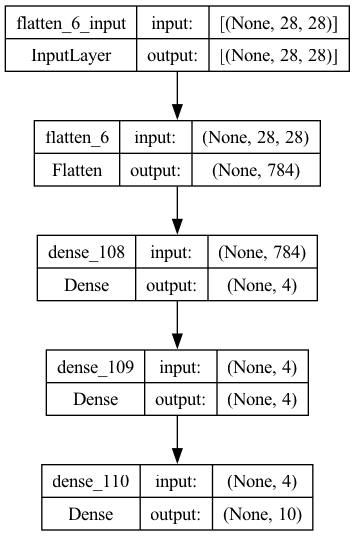

In [246]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)